# **Introduction**

Bellabeat data analysis case study is part of Google Data Analytics Capstone - Case study 2. The objective of this case study is to perform some real-world tasks of a junior data analyst. In order to answer the key business questions, the steps of the data analysis process: **ask**, **prepare**, **process**, **analyze**, **share**, and act has been followed. The analysis of the dataset has been performed in R.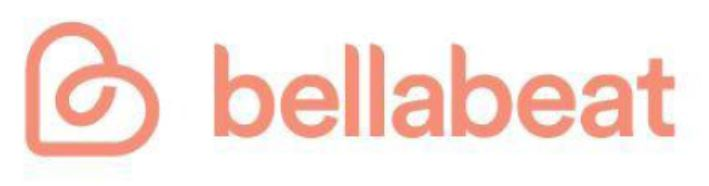

# **Background**

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer

* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

**Business Task:**
* analyze Bellabeat dataset to reveal more opportunities for growth.
* 33 users' data comprise the dataset.

# **Environment Setup**

In [1]:
# loading packages
library(tidyverse)
library(lubridate)

install.packages("gridExtra")
library(gridExtra)

install.packages("viridis")
library(viridis)

install.packages("formattable")
library(formattable)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: viridisLite

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecifi

# **Loading Dataset**

In [2]:
daily_activity <- read.csv("dailyActivity_merged.csv")
# daily steps, intensity, calories are in daily activity dataset only
calorie_hour <- read.csv("hourlyCalories_merged.csv")

intensity_hour <- read.csv("hourlyIntensities_merged.csv")

steps_hour <- read.csv("hourlySteps_merged.csv")

heartrate <- read.csv("heartrate_seconds_merged.csv")

sleep <- read.csv("sleepDay_merged.csv")

weight <- read.csv("weightLogInfo_merged.csv")

**The Features are**:-
* Daily activity track
* Distance track
* Calorie count
* Intensity check
* Step count
* Heartrate
* Sleep duration count
* Weight track

In [3]:
colnames(daily_activity)
colnames(calorie_hour)
colnames(daily_activity)
colnames(steps_hour)
colnames(heartrate)
colnames(sleep)
colnames(daily_activity)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"           "ActivityHour" "Calories"

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"           "ActivityHour" "StepTotal"

[1] "Id"    "Time"  "Value"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

# **Percentage of features used**

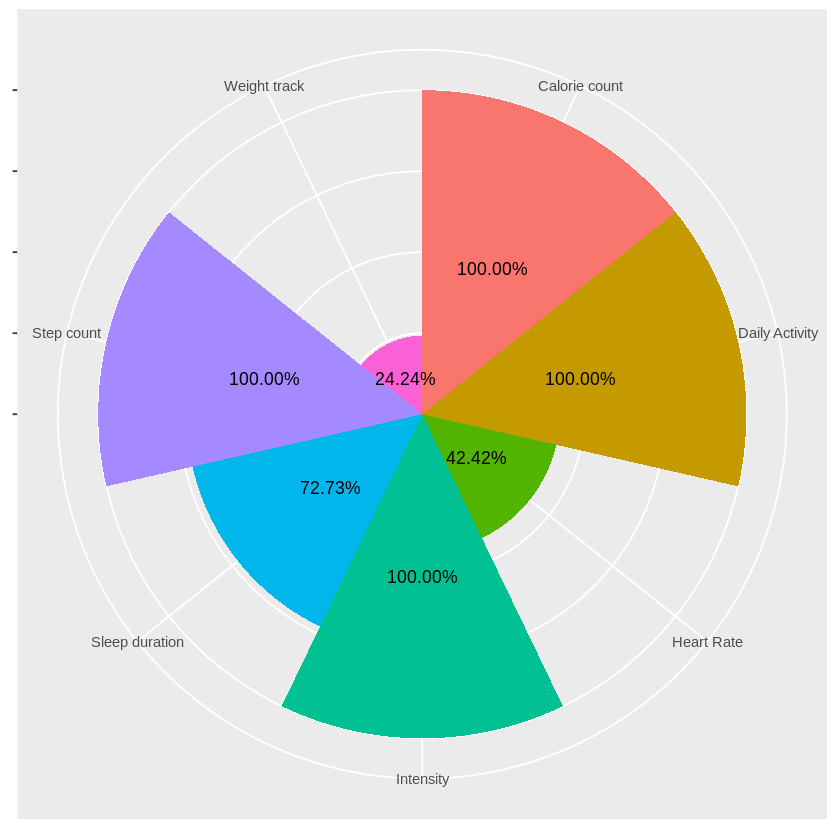

In [4]:
feature <- c("Daily Activity", "Calorie count", "Intensity", "Step count", 
             "Sleep duration","Heart Rate", "Weight track")

count_user <- c(length(unique(daily_activity$Id)),
            length(unique(calorie_hour$Id)),
            length(unique(intensity_hour$Id)),
            length(unique(steps_hour$Id)),
            length(unique(sleep$Id)),
            length(unique(heartrate$Id)),
            length(unique(weight$Id)))

use_category <- data.frame(feature, count_user) %>%
  mutate(percentage = count_user/33) %>%
  arrange(desc(percentage)) %>%
  mutate(percentage = formattable::percent(percentage, digits=2))

ggplot(use_category, aes(x = feature, y = percentage, fill = feature)) +
  geom_col(show.legend = FALSE, width = 1) + coord_polar()+
  theme(aspect.ratio = 1, axis.text.y = element_blank()) +
  geom_text(aes(label = percentage), position = position_stack(vjust = 0.5), size=3.7) +
  labs(x = NULL, y = NULL)
options(repr.plot.width=10, repr.plot.height=8)

# **1) Daily Activity**

In [5]:
dim(daily_activity)
head(daily_activity)

[1] 940  15

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [6]:
df1 <- daily_activity %>%
    mutate(Id = as.character(Id),
          ActivityDate = as.Date(ActivityDate, "%m/%d/%y"),
          day_of_week = weekdays(ActivityDate))

head(df1)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week
,<chr>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Sunday
2,1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Monday
3,1503960366,2020-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Tuesday
4,1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Wednesday
5,1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Thursday
6,1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Friday


In [7]:
df1 <- na.omit(df1)
df1 <- distinct(df1)

In [8]:
summary(df1)

      Id             ActivityDate          TotalSteps    TotalDistance   
 Length:940         Min.   :2020-04-12   Min.   :    0   Min.   : 0.000  
 Class :character   1st Qu.:2020-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Mode  :character   Median :2020-04-26   Median : 7406   Median : 5.245  
                    Mean   :2020-04-26   Mean   : 7638   Mean   : 5.490  
                    3rd Qu.:2020-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
                    Max.   :2020-05-12   Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Se

In [9]:
df1$day_of_week <- ordered(df1$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
activity <- df1 %>%
    group_by(day_of_week) %>%
    summarize(avg_step = mean(TotalSteps),
             avg_dist = mean(TrackerDistance),
             avg_calorie = mean(Calories))
activity

day_of_week,avg_step,avg_dist,avg_calorie
<ord>,<dbl>,<dbl>,<dbl>
Monday,7559.373,5.467600,2302.620
Tuesday,7405.837,5.287415,2199.571
Wednesday,7448.230,5.302936,2331.786
Thursday,8152.976,5.854677,2354.968
Friday,6933.231,5.027190,2263.000
Saturday,7780.867,5.528750,2324.208
Sunday,8125.007,5.812829,2356.013


*** Steps covered at different days of week**

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



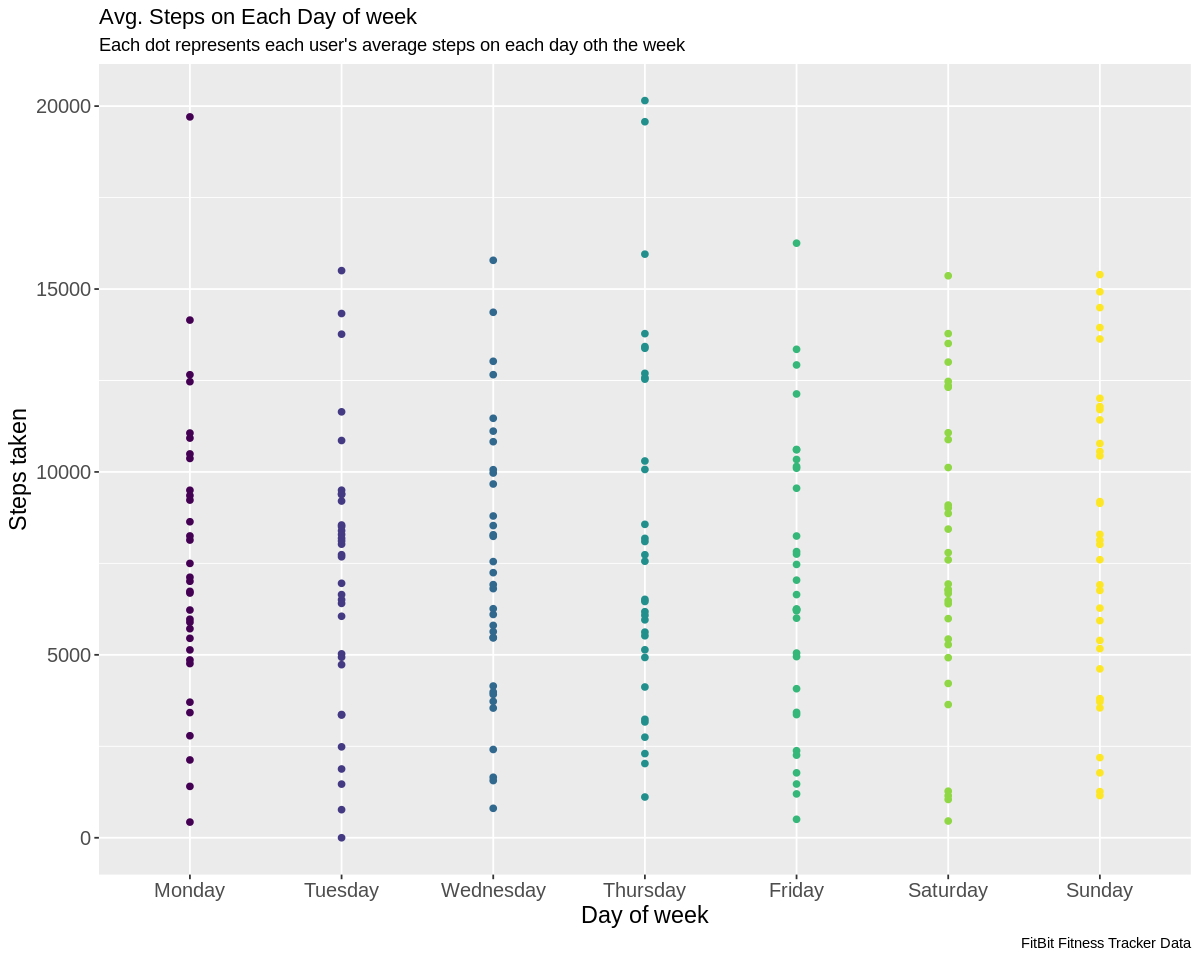

In [10]:
# Average steps covered by all users on each day of the week
df1 %>%
    group_by(Id, day_of_week) %>%
    summarize(step_count = mean(TotalSteps)) %>%
  ggplot(aes( x = day_of_week, y = step_count, color = day_of_week) ) + 
  geom_point()+ theme(legend.position = "none" ) +
  labs(title = "Avg. Steps on Each Day of week", caption = "FitBit Fitness Tracker Data",
  x = "Day of week", y = "Steps taken", subtitle = "Each dot represents each user's average steps on each day oth the week") +
  theme(axis.title = element_text(size=14), axis.text = element_text(size=12))

*** distance covered at different days of week**

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



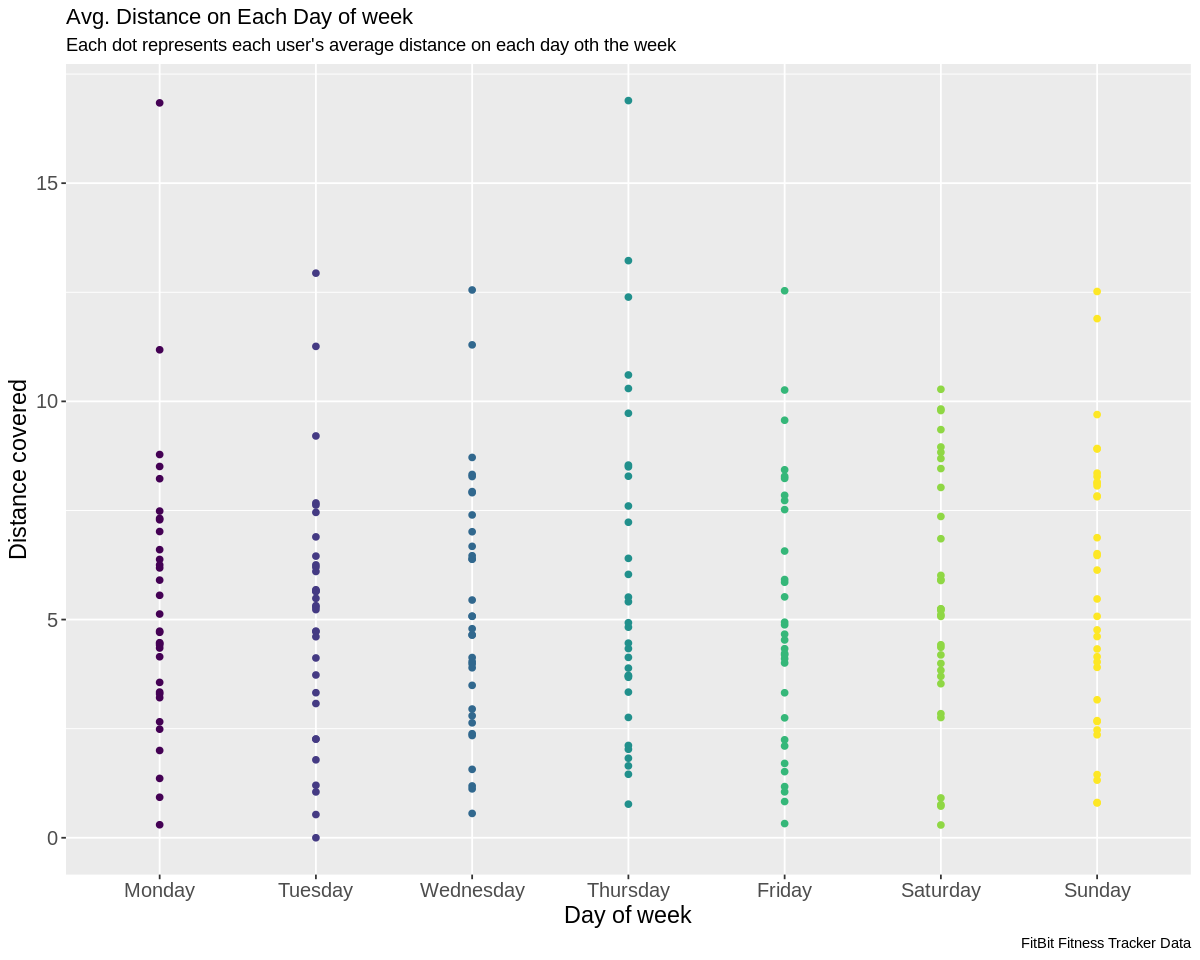

In [11]:
# Average distance covered by all users on each day of the week
df1 %>%
    group_by(Id, day_of_week) %>%
    summarize(dist = mean(TrackerDistance)) %>%
  ggplot(aes( x = day_of_week, y = dist, color = day_of_week) ) +
  geom_point()+ theme(legend.position = "none" ) +
  labs(title = "Avg. Distance on Each Day of week", subtitle = "Each dot represents each user's average distance on each day oth the week",
       caption = "FitBit Fitness Tracker Data", x = "Day of week",y = "Distance covered") +
  theme(axis.title = element_text(size=14), axis.text = element_text(size=12))

**Tracked Distance per Activity type by each user**

In [12]:
#calculating total distance per activity for every user
dist_cal <- df1 %>%
    group_by(Id) %>%
    summarize(VeryActive = sum(VeryActiveDistance),
             ModerateActive = sum(ModeratelyActiveDistance),
             LightActive = sum(LightActiveDistance),
             SedentaryActive = sum(SedentaryActiveDistance))

head(dist_cal)

Id,VeryActive,ModerateActive,LightActive,SedentaryActive
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,88.61,24.62,128.74,0.00
1624580081,29.12,11.18,80.81,0.19
1644430081,21.90,28.53,108.27,0.12
1844505072,0.26,1.52,51.07,0.00
1927972279,2.97,0.97,15.72,0.00
2022484408,75.07,22.32,153.22,0.00


In [13]:
# converting from wide-format into long-format
dist_cal <- dist_cal %>%
  select(Id, VeryActive:SedentaryActive)  %>%
  mutate(user_id = sprintf("User%02d", seq(1:33))) %>%
  gather(activity, distance, VeryActive:SedentaryActive, factor_key = T)

dist_cal$activity <- factor(dist_cal$activity, levels = c("SedentaryActive", "LightActive", "ModerateActive", "VeryActive"))
head(dist_cal,10)

Id,user_id,activity,distance
<chr>,<chr>,<fct>,<dbl>
1503960366,User01,VeryActive,88.61
1624580081,User02,VeryActive,29.12
1644430081,User03,VeryActive,21.90
1844505072,User04,VeryActive,0.26
1927972279,User05,VeryActive,2.97
2022484408,User06,VeryActive,75.07
2026352035,User07,VeryActive,0.19
2320127002,User08,VeryActive,3.31
2347167796,User09,VeryActive,19.07


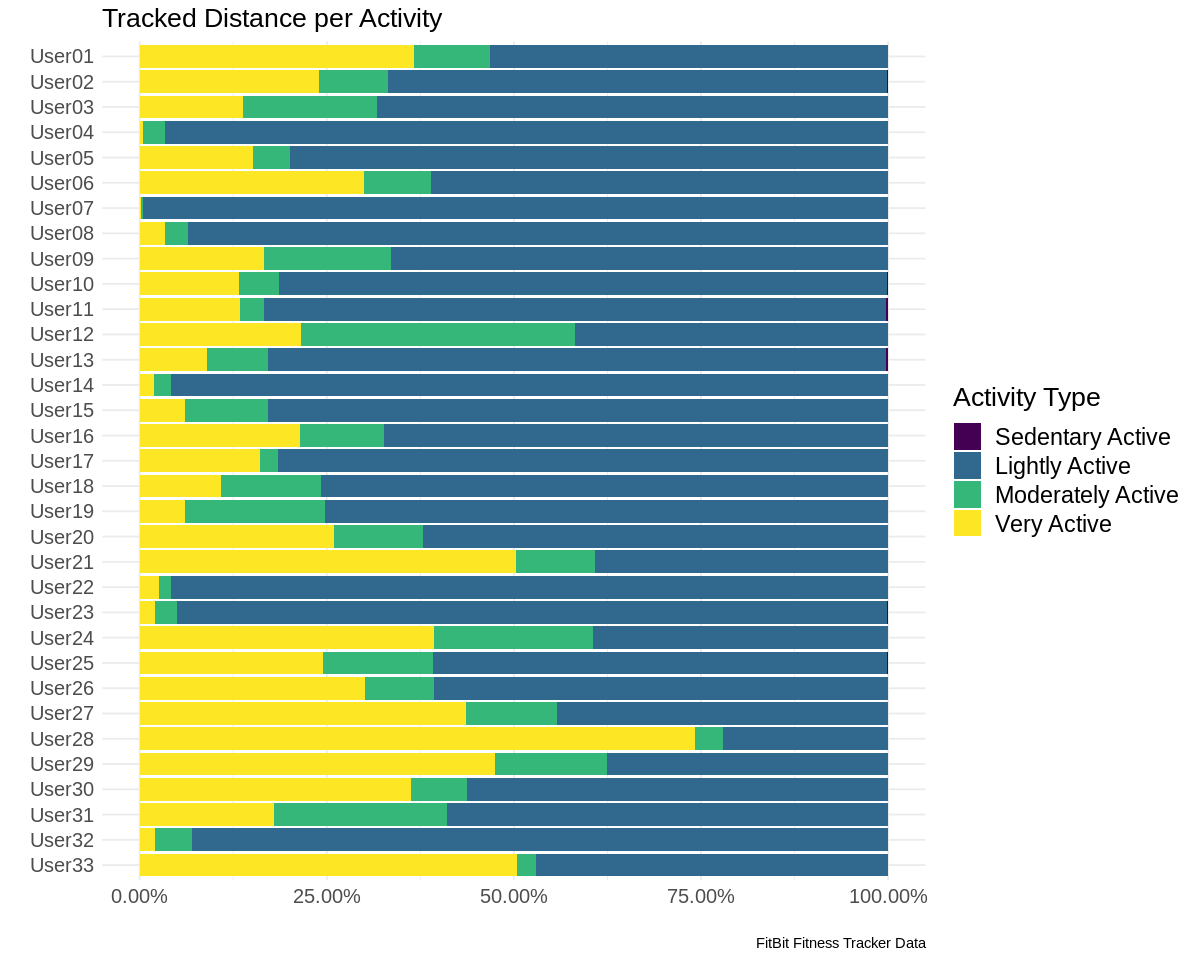

In [14]:
ggplot(dist_cal, aes(x = distance, y = user_id, fill = activity)) +
  geom_bar(stat = "identity", position = "fill") +
  theme_minimal() +
  labs(x = "", y = "", fill = "Activity Type",
       title = "Tracked Distance per Activity", caption = "FitBit Fitness Tracker Data") +
  scale_x_continuous(labels = percent) +
  scale_y_discrete(limits = rev) +
  scale_fill_viridis(discrete = T, labels = c("Sedentary Active", "Lightly Active", "Moderately Active", "Very Active"))  +
  theme(legend.title = element_text(size=16), legend.text = element_text(size=14), axis.text = element_text(size=12),
   plot.title=element_text(size=16))


**Tracked Duration per Activity type by each user**

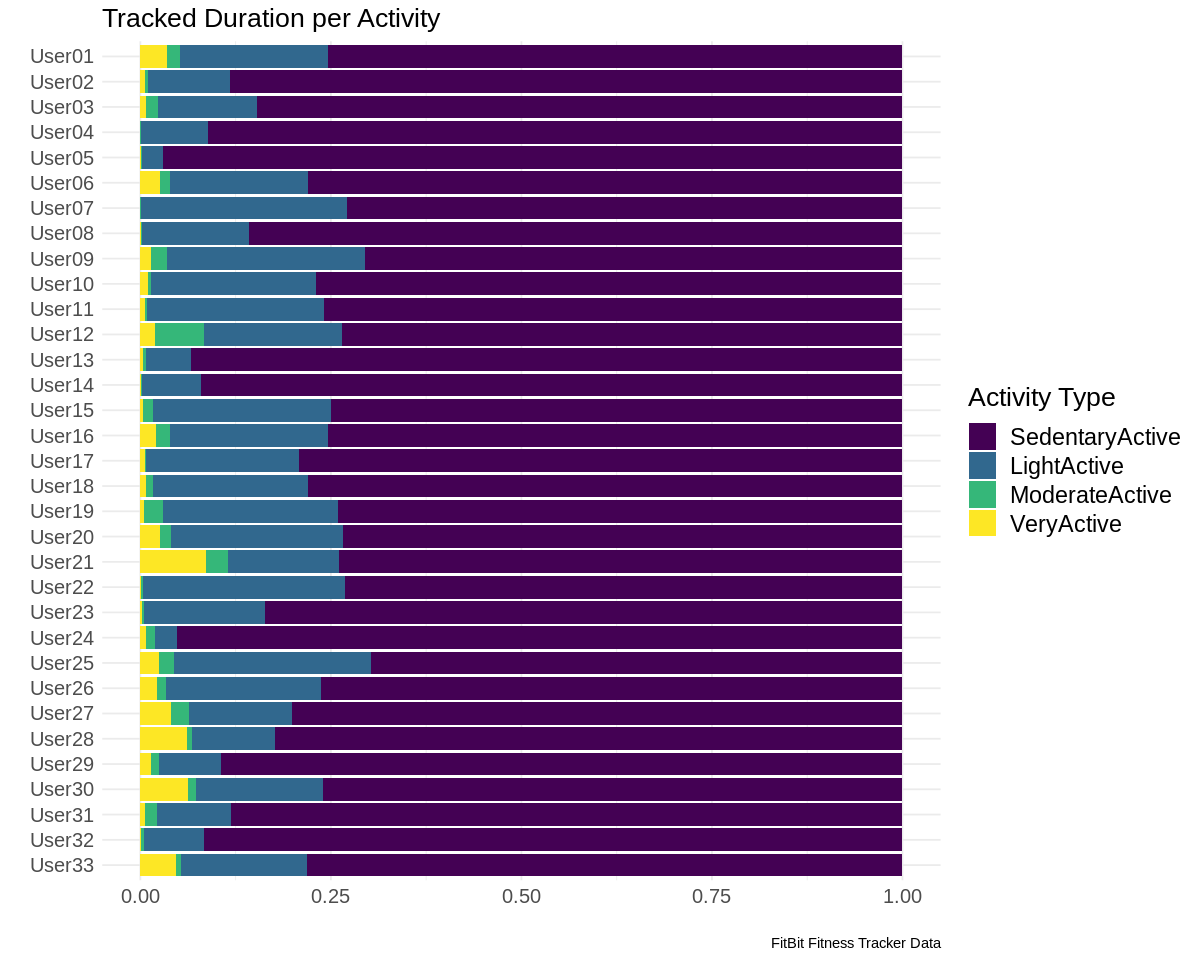

In [15]:
dur_cal <- df1 %>%
  group_by(Id) %>%
  summarise( VeryActive = sum(VeryActiveMinutes),
             ModerateActive = sum(FairlyActiveMinutes),
             LightActive = sum(LightlyActiveMinutes),
             SedentaryActive = sum(SedentaryMinutes)) %>%
  mutate(user_id = sprintf("User%02d", seq(1:33))) %>%
  select(user_id, VeryActive:SedentaryActive) %>%
  gather(activity, duration, VeryActive:SedentaryActive, factor_key = T)

dur_cal$activity <- factor(dur_cal$activity, levels = c("SedentaryActive", "LightActive", "ModerateActive", "VeryActive"))

ggplot(dur_cal, aes(x = duration, y = user_id, fill = activity)) + geom_col(position = "fill") + theme_minimal() +
  labs(x = "", y = "", fill = "Activity Type", title = "Tracked Duration per Activity", caption = "FitBit Fitness Tracker Data") +
  scale_y_discrete(limits = rev) + scale_fill_viridis_d()   + theme(legend.title = element_text(size=16), legend.text = element_text(size=14), 
  axis.text = element_text(size=12), plot.title=element_text(size=16))

**Percentage of distance covered per activity**

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



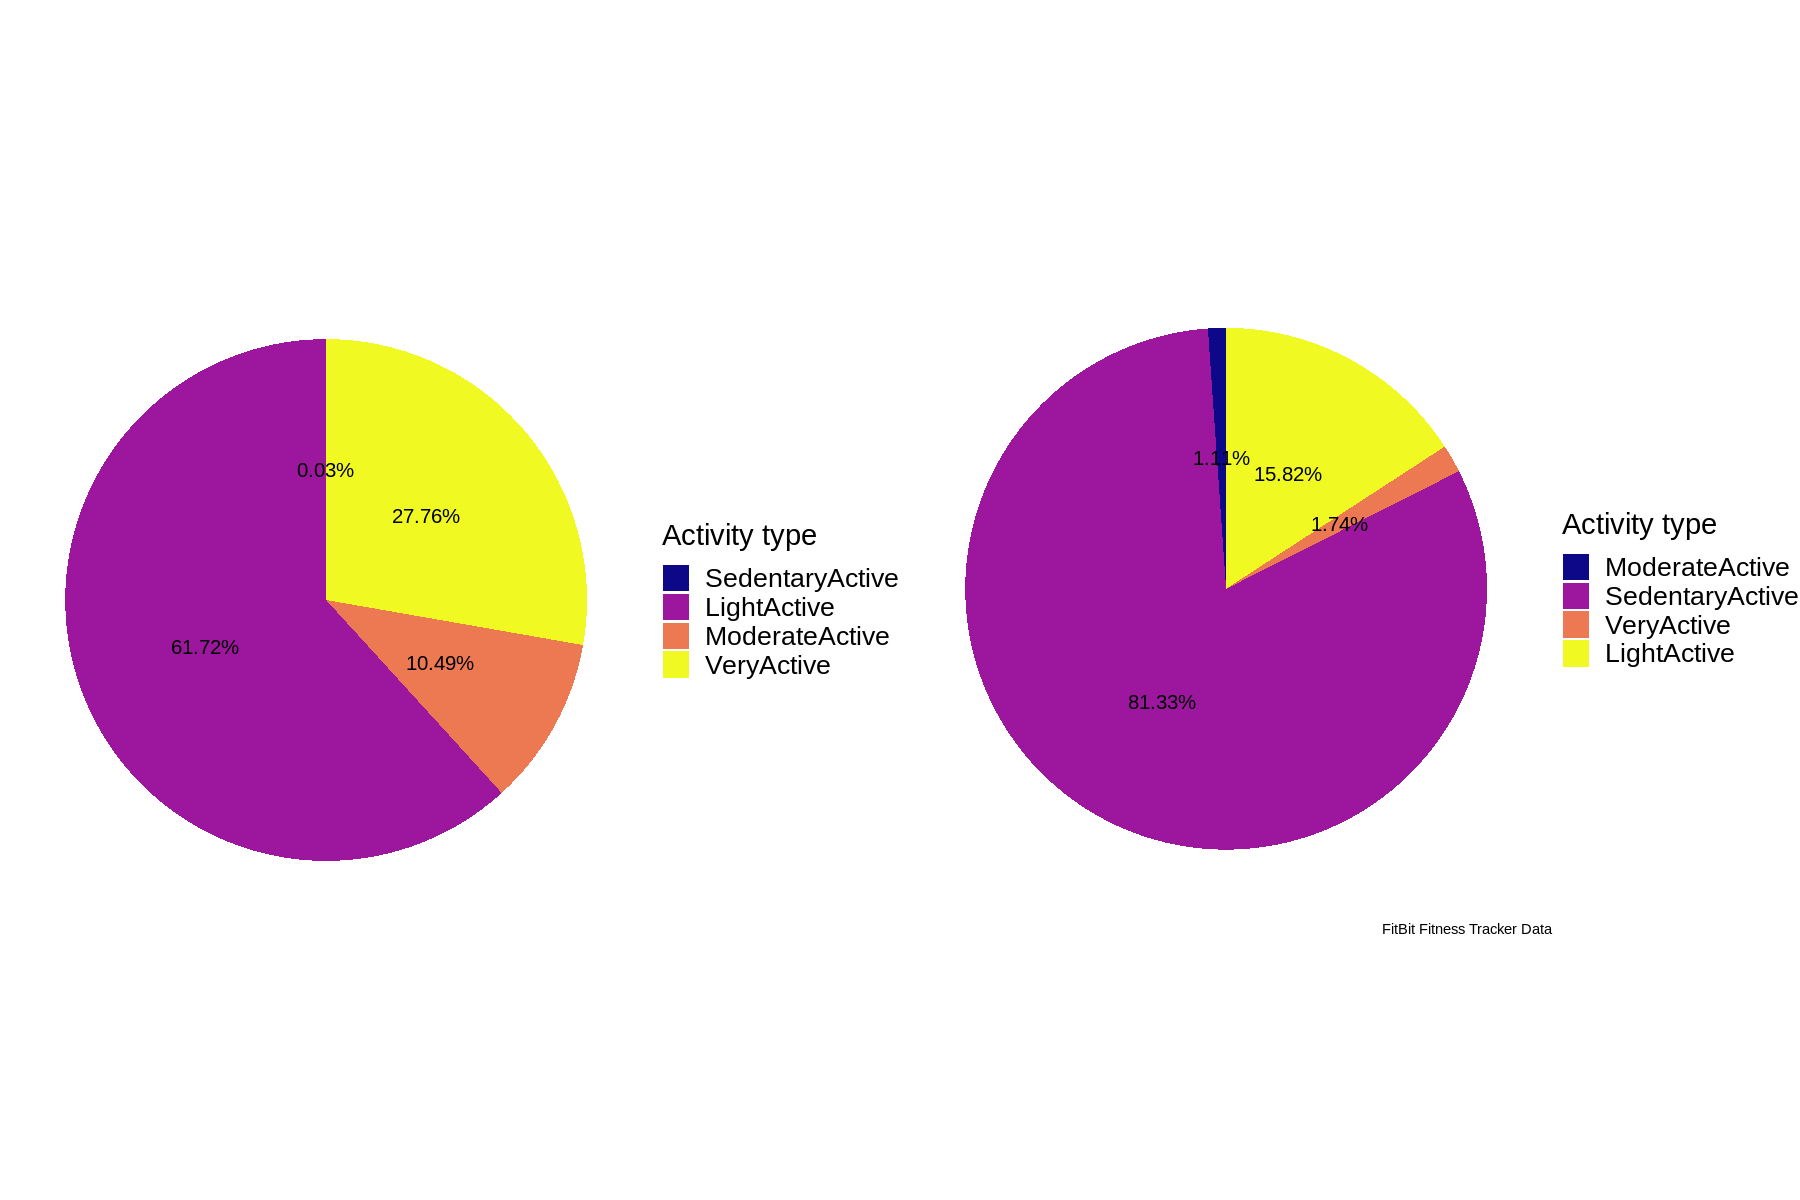

In [18]:
dist_cal_avg <- dist_cal %>%
    group_by(activity) %>%
    summarize(avg_dist = mean(distance)) %>%
    ungroup() %>%
    mutate(perc = avg_dist/sum(avg_dist),
          perc = formattable::percent(perc,2)) %>%
          arrange(-perc)
plt1 <- ggplot(dist_cal_avg, aes(x=factor(1), y=perc, fill=activity)) + geom_col(width= 1) + coord_polar(theta="y", start=0, direction = 1) + 
   theme_void() + coord_polar(theta="y", start=0, direction = 1) + geom_text(aes(label=perc), position=position_stack(vjust=0.5), size=4.3) + 
   labs(fill="Activity type") + scale_fill_viridis_d(option="C") + 
   theme(plot.title = element_text(size=20, face="bold", vjust=0.5), legend.title= element_text(size=17.5), legend.text= element_text(size=16))

#percentage of duration covered per activity
dur_cal$activity <- factor(dur_cal$activity, 
                           levels = c("ModerateActive","SedentaryActive", "VeryActive",  "LightActive"))
dur_cal_avg <-dur_cal %>%
    group_by(activity) %>%
    summarize(avg_dur = mean(duration)) %>%
    ungroup() %>%
    mutate(perc = avg_dur/sum(avg_dur),
          perc = formattable::percent(perc,2)) %>%
          arrange(-perc)
plt2 <- ggplot(dur_cal_avg, aes(x=factor(1), y=perc, fill=activity)) + geom_col(width= 1) + coord_polar(theta="y", start=0, direction = 1) + 
    geom_text(aes(label=perc), position=position_stack(vjust=0.5), size=4.3) + theme_void() + scale_fill_viridis_d(option="C") + 
    labs(caption = "FitBit Fitness Tracker Data", fill="Activity type") +
    scale_fill_viridis_d(option="C") + theme(plot.title = element_text(size=20, face="bold", vjust=0.5), legend.title= element_text(size=17.5),
     legend.text= element_text(size=16))

g1grob <- ggplotGrob(plt1)
g2grob <- ggplotGrob(plt2)

grid.arrange(g1grob, g2grob, nrow=1)
options(repr.plot.width=10, repr.plot.height=8)

Mostly users spend their time in Sedentary Activities which explains why distance spent in Sendetary activities is almost non-existant.

# **2) Hourly Intensity**

In [19]:
head(intensity_hour)

,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [20]:
df2 <- intensity_hour %>%
  mutate(ActivityHour = as.POSIXct(ActivityHour, "%m/%d/%Y %I:%M:%S %p", tz = "UTC"),
         time =  format(ActivityHour, "%I %p"),
        month= format(ActivityHour, "%B"))

head(df2)

,Id,ActivityHour,TotalIntensity,AverageIntensity,time,month
,<dbl>,<dttm>,<int>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,12 AM,April
2,1503960366,2016-04-12 01:00:00,8,0.133333,01 AM,April
3,1503960366,2016-04-12 02:00:00,7,0.116667,02 AM,April
4,1503960366,2016-04-12 03:00:00,0,0.000000,03 AM,April
5,1503960366,2016-04-12 04:00:00,0,0.000000,04 AM,April
6,1503960366,2016-04-12 05:00:00,0,0.000000,05 AM,April


In [21]:
unique(df2$month)

[1] "April" "May"

Since there is only 2 months in consideration, we cannot get any insights from monthly analysis. So we will consider hourly analysis

In [22]:
mindate = min(as.Date(df2$ActivityHour))
maxdate = max(as.Date(df2$ActivityHour))

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



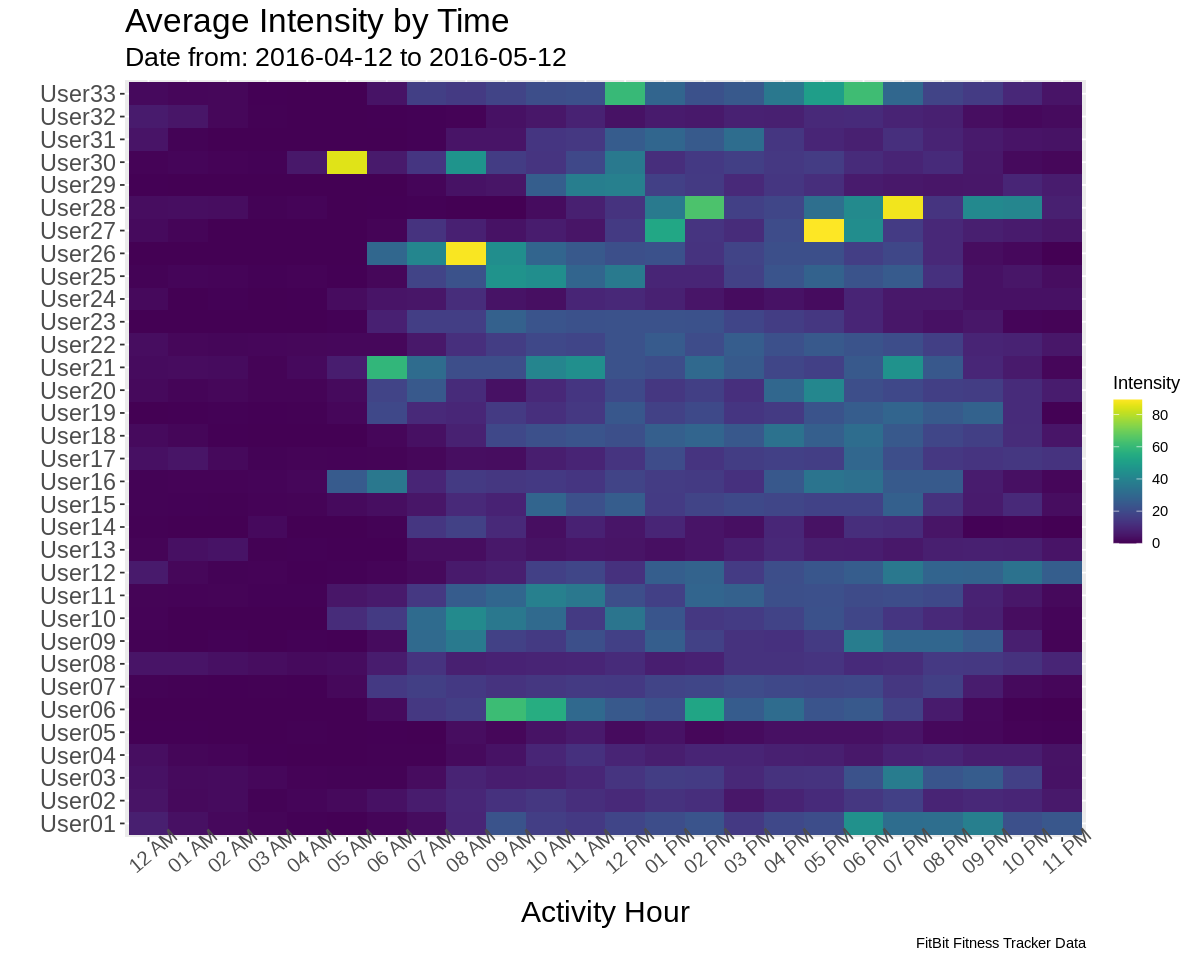

In [23]:
df2$time = ordered(df2$time, levels = c("12 AM", "01 AM", "02 AM", "03 AM", "04 AM", "05 AM", "06 AM", 
 "07 AM", "08 AM", "09 AM","10 AM","11 AM", "12 PM", "01 PM", "02 PM", "03 PM", "04 PM", 
 "05 PM", "06 PM", "07 PM", "08 PM", "09 PM","10 PM", "11 PM"))
df2 %>%
    group_by(Id, time) %>%
    summarize(avg_intensity = mean(TotalIntensity)) %>%
    ggplot(aes(x = time, y = as.factor(Id), fill = avg_intensity)) +
  geom_tile() + scale_fill_viridis() +
  scale_y_discrete(labels = sprintf("User%02d", seq(1:33))) +
  labs(x = "Activity Hour", y = "", fill = "Intensity", title = "Average Intensity by Time", 
       subtitle = paste0("Date from: ", mindate, " to ", maxdate), caption = "FitBit Fitness Tracker Data" ) + 
  theme(axis.text = element_text(size=14), axis.text.x = element_text(size=12, angle=40), 
        axis.title = element_text(size=18), plot.title = element_text(size=20), plot.subtitle = element_text(size=16))

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



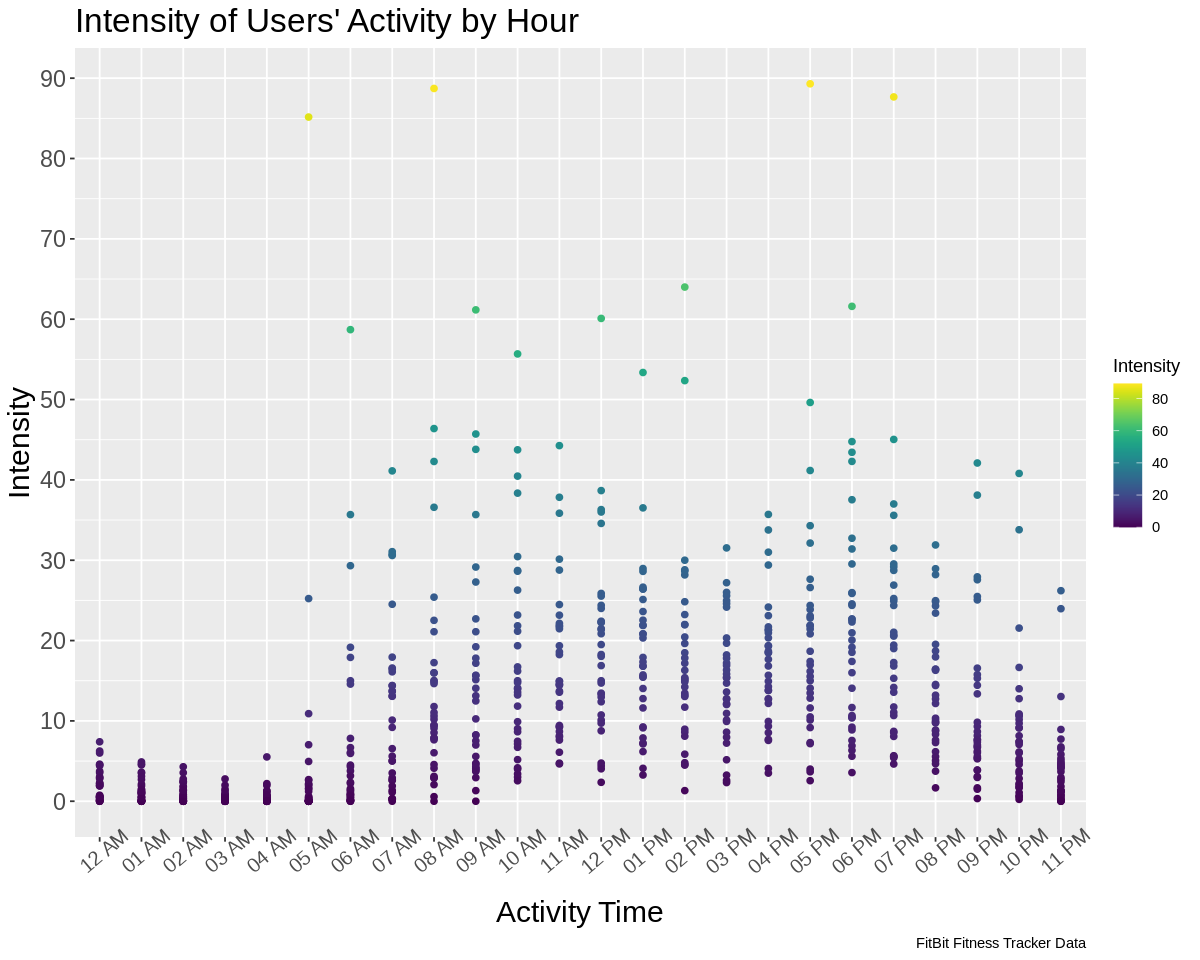

In [24]:
df2$time = ordered(df2$time, levels = c("12 AM", "01 AM", "02 AM", "03 AM", "04 AM", "05 AM", "06 AM", 
 "07 AM", "08 AM", "09 AM","10 AM","11 AM", "12 PM", "01 PM", "02 PM", "03 PM", "04 PM", 
 "05 PM", "06 PM", "07 PM", "08 PM", "09 PM","10 PM", "11 PM"))
df2 %>%
    group_by(Id, time) %>%
    summarize(avg_intensity = mean(TotalIntensity)) %>%
  ggplot(aes(x = time, y = avg_intensity, color = avg_intensity)) + geom_point() +
  scale_color_viridis() + theme_gray() +
  theme(axis.text = element_text(size=14), axis.text.x = element_text(size=12, angle=40),
        axis.title = element_text(size=18), plot.title = element_text(size=20)) +
scale_y_continuous(breaks = seq(0,100, by = 10))+ 
  labs(x = "Activity Time", y = "Intensity", title = "Intensity of Users' Activity by Hour",
       caption = "FitBit Fitness Tracker Data", color = "Intensity")

options(repr.plot.width=10, repr.plot.height=10)

* In the scatterplot, each dot represents each user's hourly average intensity
* Activity between 12 AM-4 AM is very low
* Users are least active at 3 AM
* Generally user activity increase from 8 AM- 7 PM and then starts decreasing

# **3) Hourly Step Count**

In [25]:
dim(steps_hour)
head(steps_hour)

[1] 22099     3

,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


In [26]:
df3 <- steps_hour %>%
  mutate(ActivityHour = as.POSIXct(ActivityHour, "%m/%d/%Y %I:%M:%S %p", tz = "UTC"),
         time =  format(ActivityHour, "%I %p"))

df3$time = ordered(df3$time, levels = c("12 AM", "01 AM", "02 AM", "03 AM", "04 AM", "05 AM", "06 AM", 
 "07 AM", "08 AM", "09 AM","10 AM","11 AM", "12 PM", "01 PM", "02 PM", "03 PM", "04 PM", 
 "05 PM", "06 PM", "07 PM", "08 PM", "09 PM","10 PM", "11 PM"))

In [27]:
mindate1 <- min(as.Date(df3$ActivityHour))
maxdate1 <- max(as.Date(df3$ActivityHour))

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



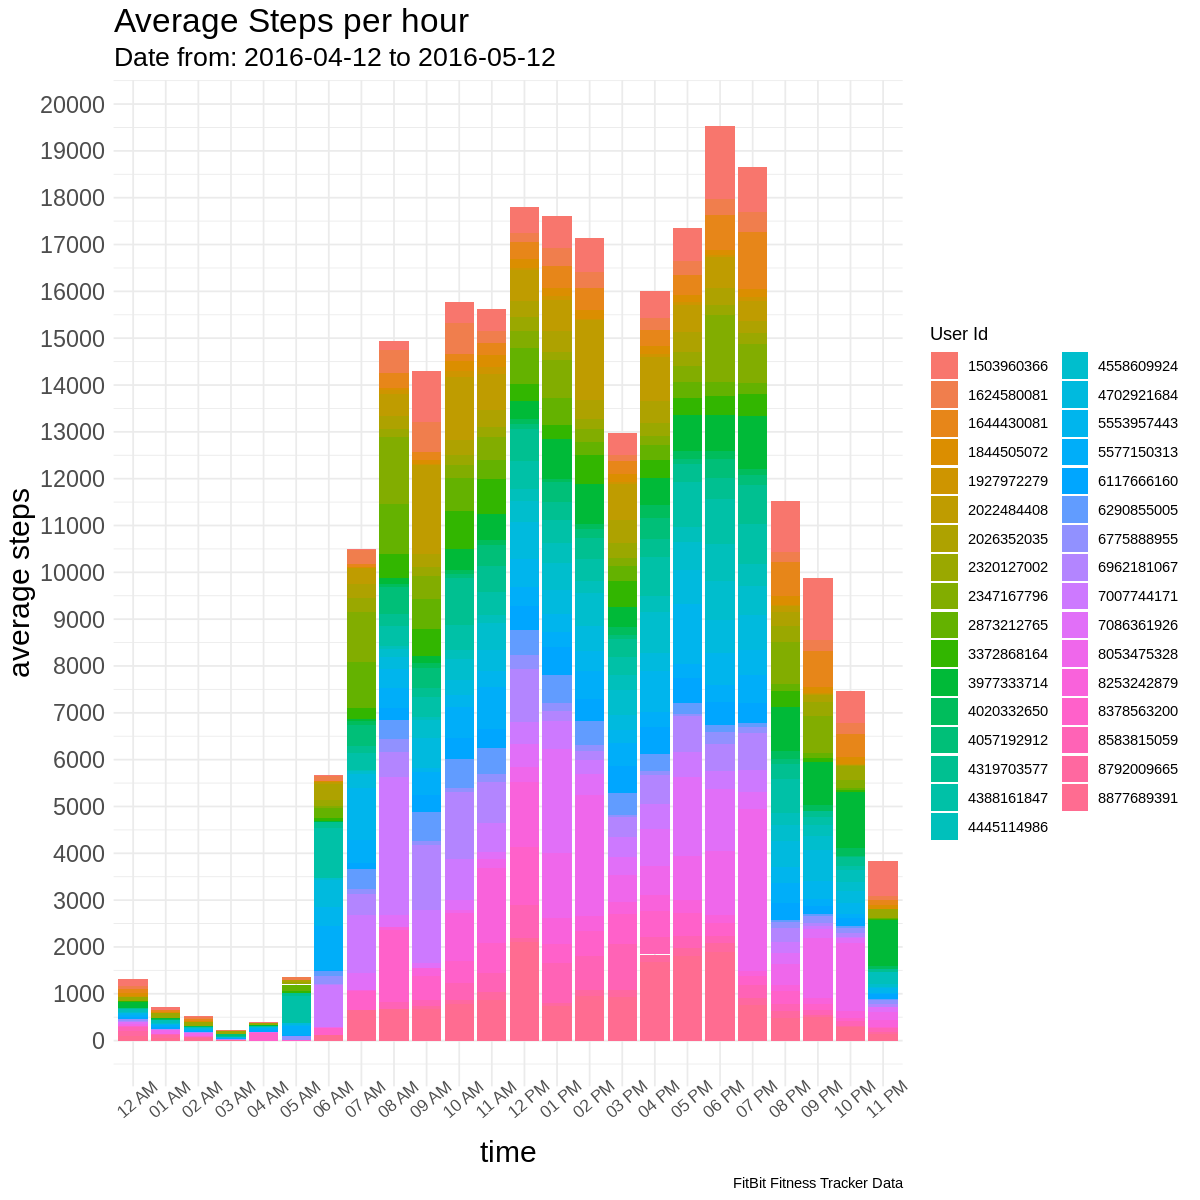

In [28]:
df3 %>%
    group_by(Id, time) %>%
    summarize(avg_steps = mean(StepTotal)) %>%
  ggplot(aes(x = time, y = avg_steps, fill= as.factor(Id))) +
  geom_col() + theme_minimal() +
  scale_y_continuous(breaks = seq(0,20000, by = 1000))+ 
  labs(title = "Average Steps per hour", subtitle = paste0("Date from: ", mindate1, " to ", maxdate1), 
       caption = "FitBit Fitness Tracker Data" , fill="User Id", y= "average steps")+
  theme(axis.text = element_text(size=14), axis.text.x = element_text(size=10, angle=40),
        axis.title = element_text(size=18), plot.title = element_text(size=20), plot.subtitle = element_text(size=16))

# **4) Hourly Calorie**

In [29]:
dim(calorie_hour)
head(calorie_hour)

[1] 22099     3

,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



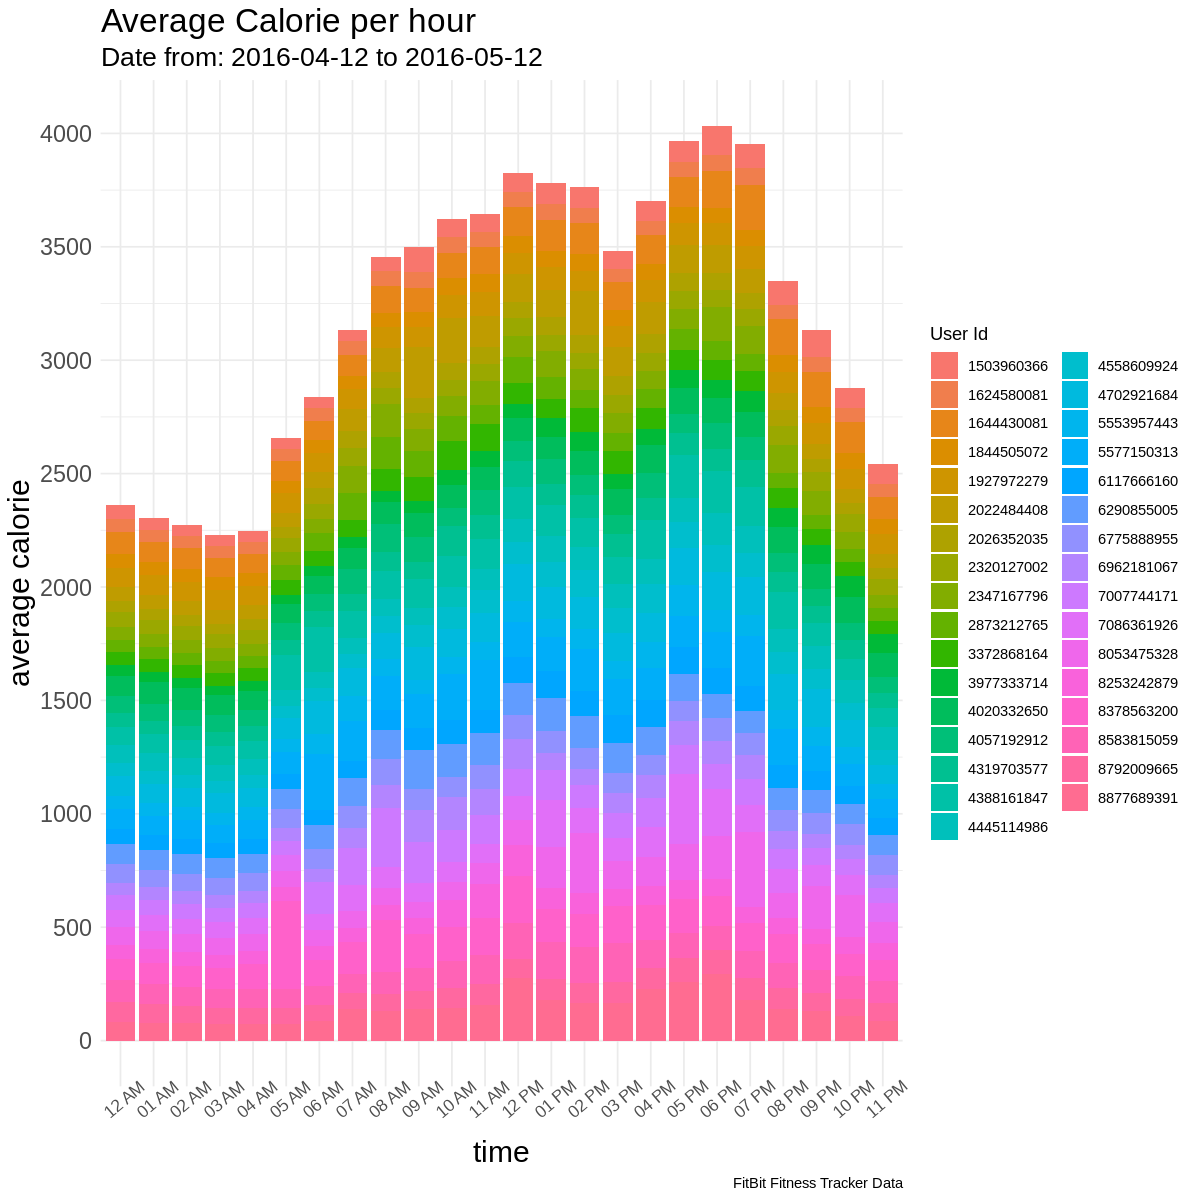

In [30]:
df4 <- calorie_hour %>%
    mutate(ActivityHour = as.POSIXct(ActivityHour, "%m/%d/%Y %I:%M:%S %p", tz="UTC"), 
          time = format(ActivityHour, "%I %p"))

df4$time = ordered(df4$time, levels = c("12 AM", "01 AM", "02 AM", "03 AM", "04 AM", "05 AM", "06 AM", 
 "07 AM", "08 AM", "09 AM","10 AM","11 AM", "12 PM", "01 PM", "02 PM", "03 PM", "04 PM", 
 "05 PM", "06 PM", "07 PM", "08 PM", "09 PM","10 PM", "11 PM"))

mindate2 <- min(as.Date(df4$ActivityHour))
maxdate2 <- max(as.Date(df4$ActivityHour))

df4 %>%
    group_by(Id, time) %>%
    summarize(avg_cal = mean(Calories)) %>%
    ggplot(aes(x=time, y=avg_cal, fill=as.factor(Id))) +
    geom_col() + theme_minimal() + scale_y_continuous(breaks = seq(0,4000, by = 500)) +
  labs(title = "Average Calorie per hour", subtitle = paste0("Date from: ", mindate2, " to ", maxdate2), 
       caption = "FitBit Fitness Tracker Data" , fill="User Id", y= "average calorie")+
  theme(axis.text = element_text(size=14), axis.text.x = element_text(size=10, angle=40),
        axis.title = element_text(size=18), plot.title = element_text(size=20), plot.subtitle = element_text(size=16))

# **5) HeartRate Analysis**

In [31]:
dim(heartrate)
head(heartrate)

[1] 2483658       3

,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


In [32]:
length(unique(heartrate$Id))

[1] 14

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



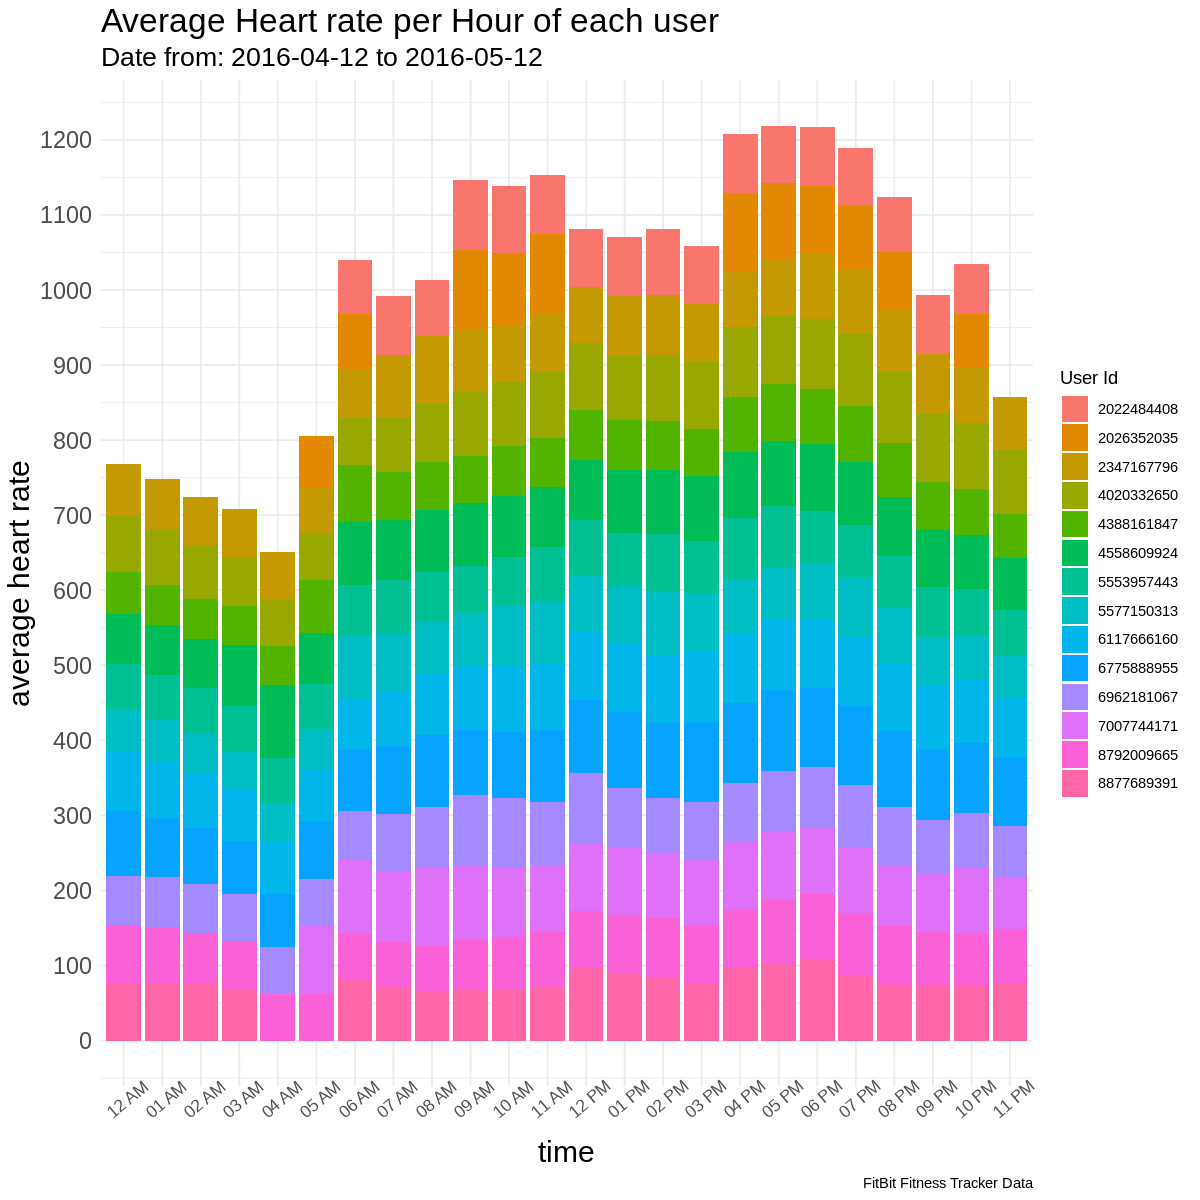

In [33]:
df4 <- heartrate %>%
    rename(date = Time) %>%
    mutate(date = as.POSIXct(date, "%m/%d/%Y %I:%M:%S %p ", tz = "UTC"),
          time = format(date, "%I %p"))

df4$time = ordered(df4$time, levels = c("12 AM", "01 AM", "02 AM", "03 AM", "04 AM", "05 AM", "06 AM", 
 "07 AM", "08 AM", "09 AM","10 AM","11 AM", "12 PM", "01 PM", "02 PM", "03 PM", "04 PM", 
 "05 PM", "06 PM", "07 PM", "08 PM", "09 PM","10 PM", "11 PM"))

mindate3 <- min(as.Date(df4$date))
maxdate3 <- max(as.Date(df4$date))

df4 %>%
    group_by(Id, time) %>%
    summarize(avg_heartrate = mean(Value)) %>%
    ggplot(aes(x = time, y = avg_heartrate, fill=as.factor(Id))) + geom_col() + theme_minimal() +
    labs(y= "average heart rate", title = "Average Heart rate per Hour of each user", 
        subtitle = paste0("Date from: ", mindate3, " to ", maxdate3), 
       caption = "FitBit Fitness Tracker Data" , fill="User Id")+
    scale_y_continuous(breaks = seq(0, 1250, by=100)) +
  theme(axis.text = element_text(size=14), axis.text.x = element_text(size=10, angle=40),
        axis.title = element_text(size=18), plot.title = element_text(size=20), plot.subtitle = element_text(size=16))

In [34]:
summary(df4$Value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  36.00   63.00   73.00   77.33   88.00  203.00 

In [35]:
#  Categorizing Heart rate as Low, Good and Bad
# based on normal heart rate for adults
df4$heartrate_type <- ifelse((df4$Value>=60 & df4$Value<=100), "Good", "Bad")
df4$heartrate_type <- ifelse(df4$Value<60, "Low", df4$heartrate_type)

head(df4)

,Id,date,Value,time,heartrate_type
,<dbl>,<dttm>,<int>,<ord>,<chr>
1,2022484408,2016-04-12 07:21:00,97,07 AM,Good
2,2022484408,2016-04-12 07:21:05,102,07 AM,Bad
3,2022484408,2016-04-12 07:21:10,105,07 AM,Bad
4,2022484408,2016-04-12 07:21:20,103,07 AM,Bad
5,2022484408,2016-04-12 07:21:25,101,07 AM,Bad
6,2022484408,2016-04-12 07:22:05,95,07 AM,Good


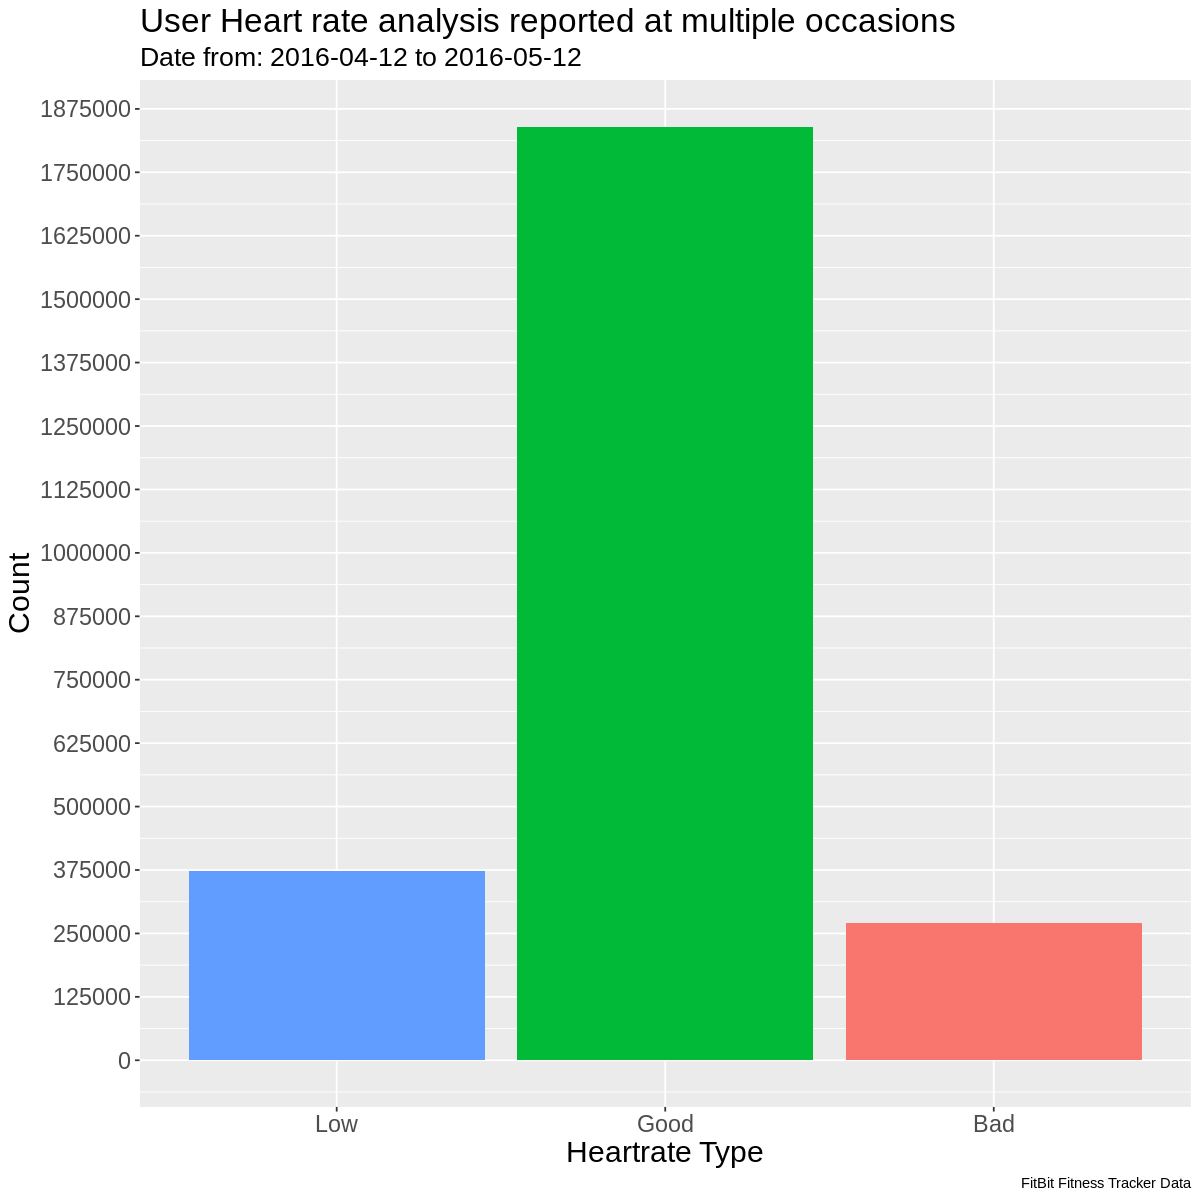

In [36]:
df4 %>%
  ggplot(aes(x=heartrate_type, fill= heartrate_type)) + geom_bar() + scale_y_continuous(breaks=seq(0, 20000000, by=125000)) +
  labs(x="Heartrate Type", y= "Count", title = "User Heart rate analysis reported at multiple occasions", subtitle = paste0("Date from: ", mindate3, " to ", maxdate3), 
  caption = "FitBit Fitness Tracker Data" , fill="Heartrate Type") + scale_x_discrete(limits = rev) +  
       theme(axis.text = element_text(size=14), axis.title = element_text(size=18), plot.title = element_text(size=20), plot.subtitle = element_text(size=16),
          legend.position="none")

* Heart rate of users is higher between 9 am-11 am and again between 4 pm- 7 pm.
* If the users are working class people, then the morning slot might be the rush time to leave for their respective office and the evening slot might be their time for return.
*  Since age of users is not mentioned, general healthy hearbeat for Adults is considered for categorization.
*  Low(if not athlete) and Bad heart rate were reported in less but multiple occasions.



# **5) Sleep Analysis**

In [37]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [38]:
df5 <- sleep %>%
    rename(date = SleepDay,
          time_asleep = TotalMinutesAsleep) %>%
    mutate(date = as.POSIXct(date, "%m/%d/%Y %I:%M:%S %p ", tz = "UTC"),
          time_awake = TotalTimeInBed - time_asleep)

mindate4 <- min(as.Date(df5$date))
maxdate4 <- max(as.Date(df5$date))

head(df5)

,Id,date,TotalSleepRecords,time_asleep,TotalTimeInBed,time_awake
,<dbl>,<dttm>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346,19
2,1503960366,2016-04-13,2,384,407,23
3,1503960366,2016-04-15,1,412,442,30
4,1503960366,2016-04-16,2,340,367,27
5,1503960366,2016-04-17,1,700,712,12
6,1503960366,2016-04-19,1,304,320,16


In [39]:
length(unique(df5$Id))

[1] 24

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



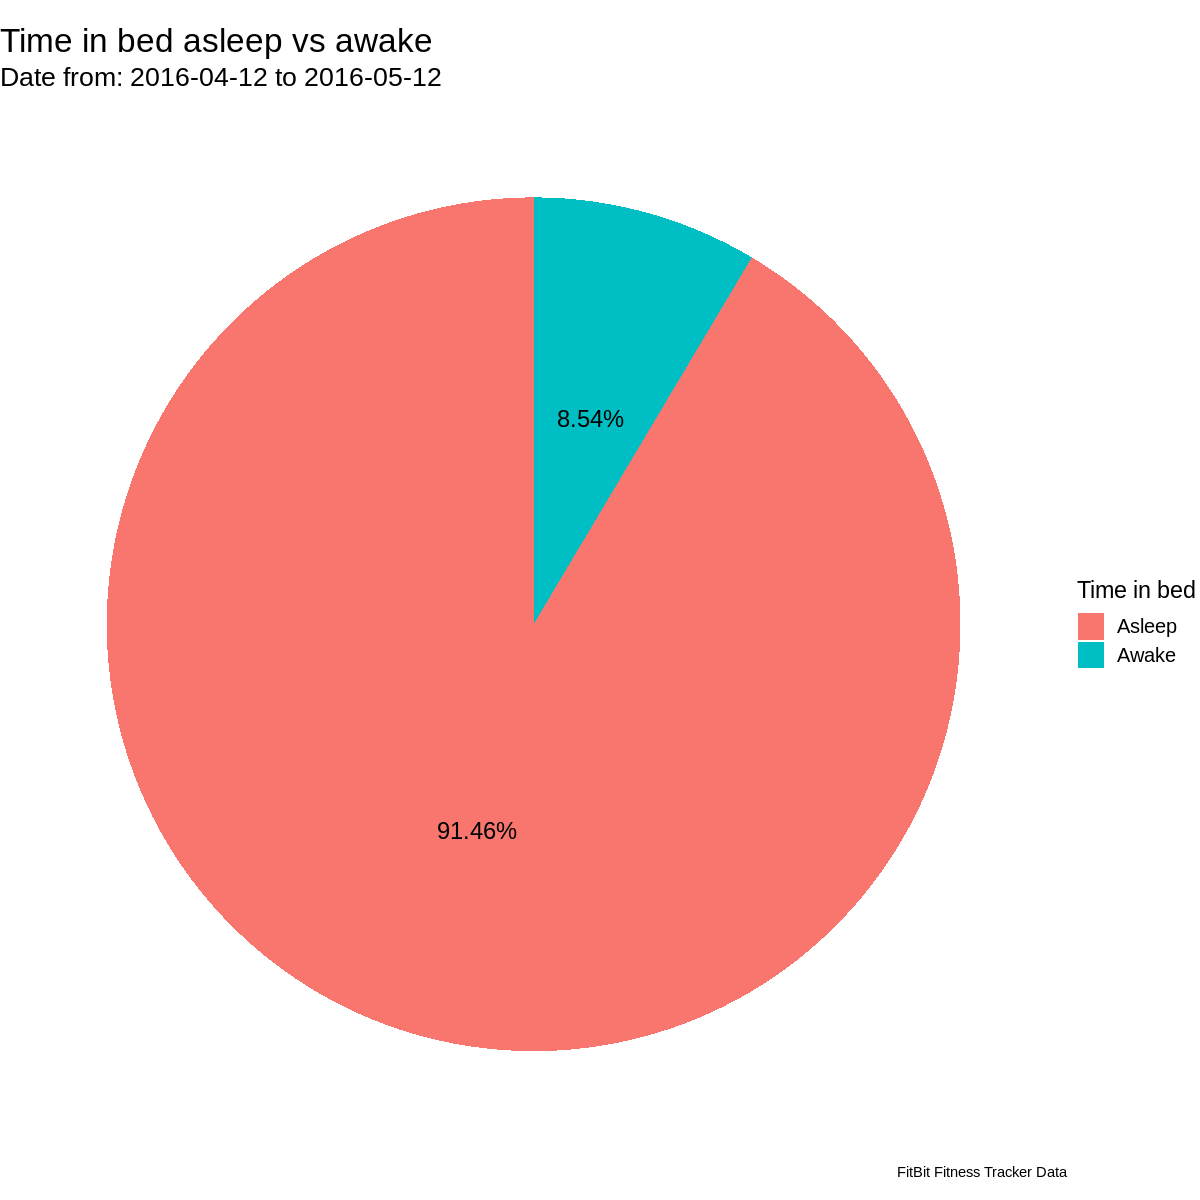

In [40]:
df5 %>%
    summarize(avg_time_asleep = mean(time_asleep),
    avg_time_awake = mean(time_awake),
    avg_time_inbed = mean(TotalTimeInBed),
    perc_time_asleep = formattable::percent(avg_time_asleep/avg_time_inbed),
    perc_time_awake = formattable::percent(avg_time_awake/avg_time_inbed)) %>%
    select(perc_time_asleep:perc_time_awake) %>%
    gather(activity, perc_time, perc_time_asleep:perc_time_awake, factor_key = T) %>%
    ggplot(aes(x="", y=perc_time, fill=activity)) + geom_col() + coord_polar("y") +
    geom_text(aes(label=perc_time), size=5, position=position_stack(vjust=0.5)) + 
    labs(x="", y="", title="Time in bed asleep vs awake", subtitle = paste0("Date from: ", mindate4, " to ", maxdate4), 
         caption = "FitBit Fitness Tracker Data")+ theme_void() +                             
    theme(axis.text = element_blank(), axis.title = element_blank(), plot.title = element_text(size=20), 
          plot.subtitle = element_text(size=16), legend.title=element_text(size=14),
         legend.text=element_text(size=12)) + 
scale_fill_manual(values = c("#d8b365", "#5ab4ac")) +
scale_fill_discrete(name = "Time in bed", labels = c("Asleep", "Awake"))

options(repr.plot.height=10, repr.plot.width=8)

**Percentage of time in bed asleep vs awake per user**

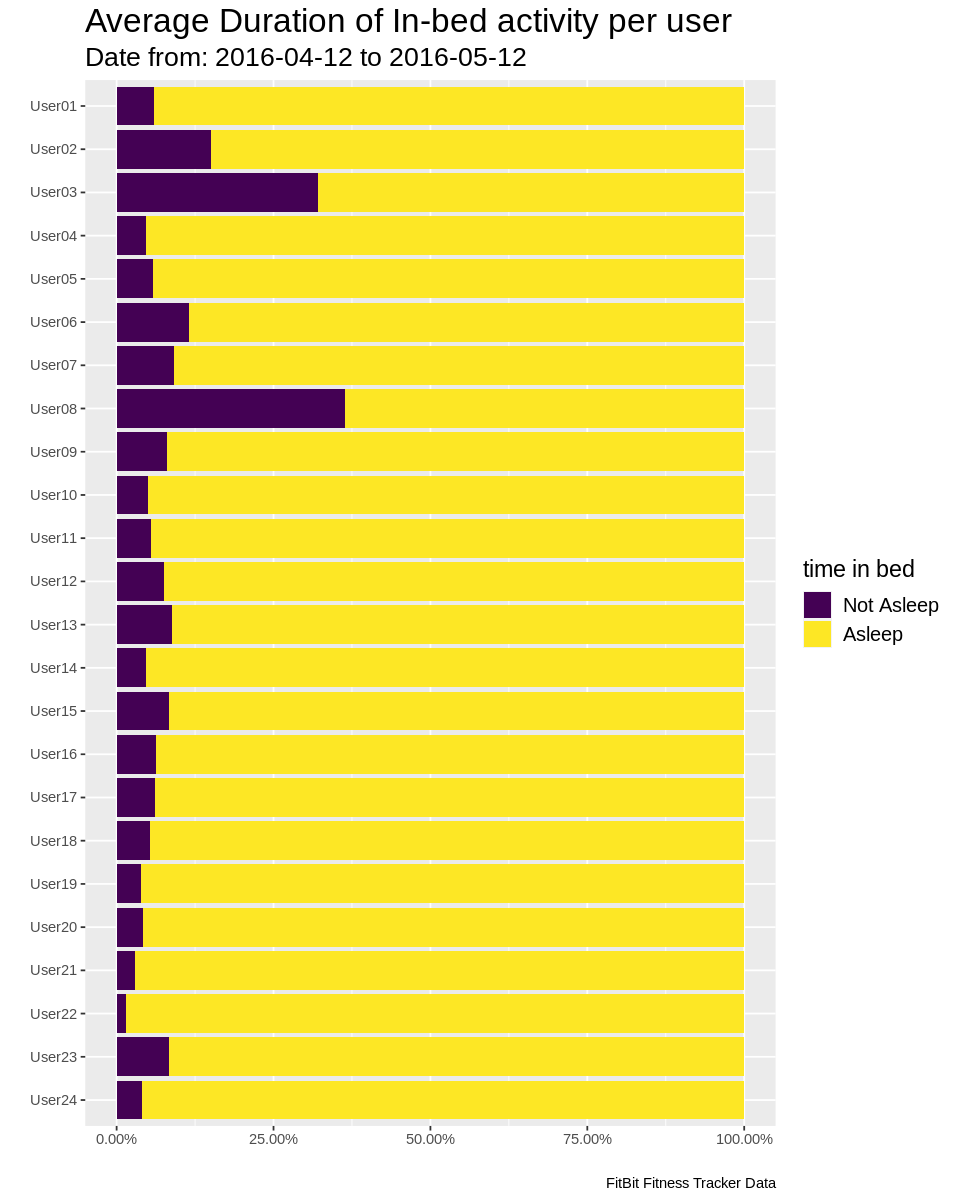

In [41]:
df5 %>%
    group_by(Id)  %>%
    summarize(avg_time_asleep = mean(time_asleep),
    avg_time_awake = mean(time_awake),) %>%
    mutate(user_id = sprintf("User%02d", seq(1:24))) %>%
    select(user_id, avg_time_awake, avg_time_asleep) %>%
    gather(time_in_bed, avg_time, avg_time_asleep, avg_time_awake, factor_key = T) %>%
    ggplot(aes(x=avg_time, y=user_id, fill=time_in_bed)) + geom_col(position="fill") +
    scale_x_continuous(labels = percent) + scale_y_discrete(limits = rev) +
    scale_fill_viridis(discrete = T, labels = c("Not Asleep", "Asleep"),
                       limits = rev) + 
    labs(x = "", y = "", fill = "time in bed", title = "Average Duration of In-bed activity per user",
         subtitle = paste0("Date from: ", mindate4, " to ", maxdate4), caption = "FitBit Fitness Tracker Data") +
    theme(plot.title = element_text(size=20), plot.subtitle = element_text(size=16), 
          legend.title=element_text(size=14), legend.text=element_text(size=12))
    

# **6) Weight**

In [42]:
dim(weight)
head(weight,8)

[1] 67  8

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12
7,4319703577,5/4/2016 11:59:59 PM,72.3,159.3942,NA,27.38,True,1.462406e+12
8,4558609924,4/18/2016 11:59:59 PM,69.7,153.6622,NA,27.25,True,1.461024e+12


Warning message:
“Ignoring unknown parameters: legend.position”


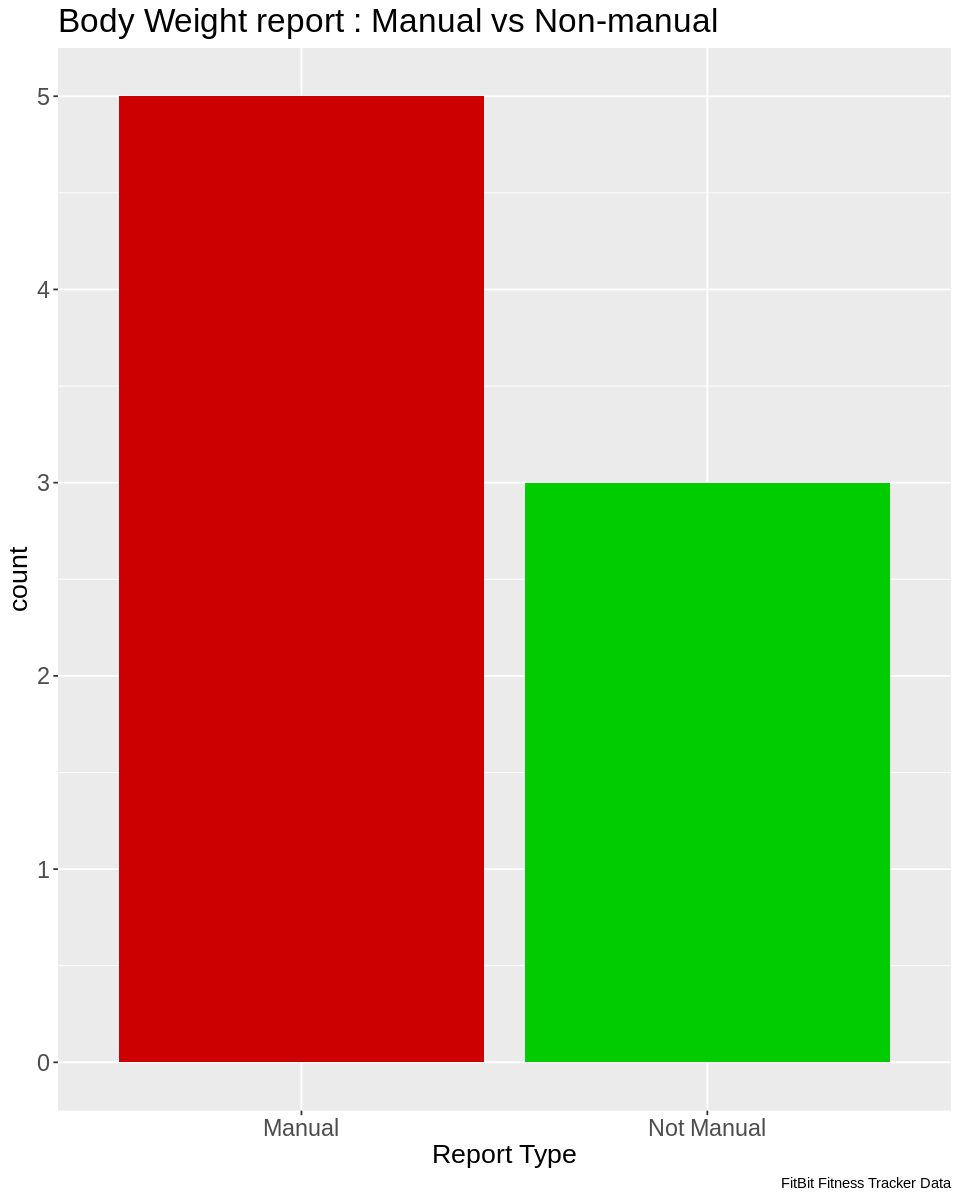

In [43]:
df6 <- weight %>%
    mutate(IsManualReport = as.logical(IsManualReport)) %>%
    group_by(Id) %>%
    summarize(report_type = as.logical(mean(IsManualReport)))

df6$report_type <- ifelse(df6$report_type==TRUE, "Manual", "Not Manual")

ggplot(df6, aes(x=report_type, fill=report_type)) + geom_bar(legend.position="none")+ 
scale_fill_manual(values = c("#cc0000", "#00cc00"))+ 
labs(x="Report Type", fill = "Report Type", title = "Body Weight report : Manual vs Non-manual", 
    caption = "FitBit Fitness Tracker Data") +
theme(plot.title = element_text(size=20), legend.position="none",
          axis.title=element_text(size=16), axis.text=element_text(size=14))

# **Limitations**

1. **Insufficient sample size-** It is not possible to analyze users' trends by analyzing 33 users. Moreover not all users report their data as seen in datasets of Sleep duration, Heart rate and weight track.
2. **No data on users' gender or age.** Since there is no data on age or gender, if users' sleep pattern, weight or heart rate is healthy could not be analyzed. 
3. **No data on the pecentage of Bellabeat product usage.**
4. **No data on reason for Bellabeat product preference.**



# **Conclusion**

1. Percentage of feature used-
    *  Step count, Calorie count, Intensity measure - 100%
    *  Sleep duration track - 72.73% (24 users)
    * Heart rate track - 42.42% (14 users)
    * Weight track - 24.24% (8 users)
    
2.  a) Users are mostly active during 8 AM- 7 PM

    b) Users are least active at 3 AM
    
3. Average step count is highest on Thursday, Sunday and Saturday.
4. Average distance traveled is highest on Thursday, Sunday and Saturday.
5. a) Users spend most of their time in Sedentary activities(81.33%). So
   distance covered in Sedentary activities is least.
   
   b) Users cover most of their distance in Lightly Active activities.
6. a) Heart rate of users is higher between 9 am-11 am and again between
    4 pm- 7 pm.
    
   b) If the users are working class people, then the morning slot might be
   the rush time to leave for their respective office and the evening slot
   might be their time for return.
   
7. 5 out of 8 users who their weight, report manually.
8. Users' spend their time in bed-
    * Awake - 8.54%
    * Aspleep - 91.46%

# **Recommendation**



1.   Since users are more active between 8 AM-7 PM,  promotion campaign could be run during the mentioned time.
2.   Gathering data on -
*   which Bellabeat products are preferred and why
*   age and spending pattern of users can be monitored for providiing tailored benefits.
3.   analysis on why users hesitate to use heartrate, sleep and weight tracker or why data on them is low.
4.   Sending tailored/personalized emails to users on their activity behaviour(like total distance/ duration traveled, Activity type involved, sleep behaviour etc.) and how new or other current products compare to their current product in use. They can also send information on healthy life options based on calorie.
5.   Providing membership benefits.
6.   Sending alerts to users when abnormal heart rate is detected, with provision to call health care services. Later Bellabeat can send email highlighting monthly alerts sent to users showcasing their product benefit and that they care for their users.